In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [6]:
df = pd.read_csv('/kaggle/input/notebookb8c2b912be/final_datasetBSL.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})

df.dtypes

0          object
1         float64
2         float64
3         float64
4         float64
           ...   
59        float64
60        float64
61        float64
62         object
Output     object
Length: 64, dtype: object

In [7]:
df.shape

(55499, 64)

In [8]:
def convert_to_float(value):
    if value is None:
            return value
    else:
        if value == '0':
            return value
        return float(value[1:])

In [9]:
def convert_to_float1(value):
    if value is None:
            return value
    else:
        if value == '0':
            return value
        return float(value[:-1])

In [79]:
df[0] = df[0].apply(convert_to_float)
df[62] = df[62].apply(convert_to_float1)

In [82]:
df[0] = df[0].astype(float)
df[62] = df[62].astype(float)

In [84]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
59        float64
60        float64
61        float64
62        float64
Output     object
Length: 64, dtype: object

In [85]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (55499, 64)


In [86]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 28407


In [87]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [89]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.524275,0.778837,-2.078063e-06,0.356980,0.652345,-0.048806,0.277079,0.454642,-0.081093,0.283097,...,0.472786,0.517141,-0.167304,0.426060,0.597918,-0.150919,0.435160,0.617004,-0.127212,N
1,0.549460,0.779025,-2.228619e-06,0.385266,0.720101,-0.053052,0.273551,0.543914,-0.090179,0.307114,...,0.630847,0.499997,-0.169370,0.588205,0.639495,-0.129231,0.594614,0.690961,-0.078680,N
3,0.550101,0.813686,-1.608361e-06,0.368826,0.757234,-0.059831,0.253754,0.566880,-0.098756,0.289586,...,0.593638,0.534599,-0.172371,0.543742,0.679877,-0.135557,0.553153,0.744503,-0.087507,N
4,0.419856,0.640248,-2.262391e-06,0.291588,0.557876,-0.024651,0.205954,0.395059,-0.045695,0.174220,...,0.368967,0.357451,-0.157743,0.312940,0.446585,-0.152646,0.312792,0.516527,-0.137097,N
5,0.578928,0.819260,-1.239632e-06,0.393598,0.765790,-0.069346,0.277497,0.581235,-0.115086,0.314678,...,0.632101,0.492136,-0.221085,0.593554,0.647005,-0.180198,0.604865,0.718873,-0.120204,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55490,0.135743,0.772949,-1.165135e-06,0.078565,0.632793,-0.091579,0.126276,0.490569,-0.156263,0.251104,...,0.689994,0.700252,-0.191389,0.800563,0.709942,-0.205060,0.905420,0.705890,-0.204853,J
55492,0.297412,0.801325,-9.988502e-07,0.213681,0.651946,-0.015936,0.214315,0.477181,-0.037143,0.316112,...,0.765387,0.515986,-0.138461,0.860219,0.464986,-0.157323,0.941798,0.418230,-0.161926,J
55494,0.207655,0.790856,-1.108746e-06,0.129440,0.645517,-0.018560,0.131272,0.483589,-0.038156,0.229540,...,0.660901,0.510157,-0.114974,0.751683,0.462870,-0.129131,0.831201,0.419102,-0.129156,J
55495,0.150396,0.852759,-1.336948e-06,0.090065,0.700602,-0.063863,0.116933,0.531551,-0.112877,0.243324,...,0.694093,0.712461,-0.177172,0.800674,0.712015,-0.186997,0.898596,0.701553,-0.183355,J


In [90]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (27092, 64)


In [91]:
df.to_csv('cleaned_Data.csv')

In [26]:
df = pd.read_csv("/kaggle/input/fgh123/cleaned_Data.csv")

In [27]:
df = df.drop("Unnamed: 0", axis=1)

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.524275,0.778837,-2.078063e-06,0.356980,0.652345,-0.048806,0.277079,0.454642,-0.081093,0.283097,...,0.472786,0.517141,-0.167304,0.426060,0.597918,-0.150919,0.435160,0.617004,-0.127212,N
1,0.549460,0.779025,-2.228619e-06,0.385266,0.720101,-0.053052,0.273551,0.543914,-0.090179,0.307114,...,0.630847,0.499997,-0.169370,0.588205,0.639495,-0.129231,0.594614,0.690961,-0.078680,N
2,0.550101,0.813686,-1.608361e-06,0.368826,0.757234,-0.059831,0.253754,0.566880,-0.098756,0.289586,...,0.593638,0.534599,-0.172371,0.543742,0.679877,-0.135557,0.553153,0.744503,-0.087507,N
3,0.419856,0.640248,-2.262391e-06,0.291588,0.557876,-0.024651,0.205954,0.395059,-0.045695,0.174220,...,0.368967,0.357451,-0.157743,0.312940,0.446585,-0.152646,0.312792,0.516527,-0.137097,N
4,0.578928,0.819260,-1.239632e-06,0.393598,0.765790,-0.069346,0.277497,0.581235,-0.115086,0.314678,...,0.632101,0.492136,-0.221085,0.593554,0.647005,-0.180198,0.604865,0.718873,-0.120204,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27087,0.135743,0.772949,-1.165135e-06,0.078565,0.632793,-0.091579,0.126276,0.490569,-0.156263,0.251104,...,0.689994,0.700252,-0.191389,0.800563,0.709942,-0.205060,0.905420,0.705890,-0.204853,J
27088,0.297412,0.801325,-9.988502e-07,0.213681,0.651946,-0.015936,0.214315,0.477181,-0.037143,0.316112,...,0.765387,0.515986,-0.138461,0.860219,0.464986,-0.157323,0.941798,0.418230,-0.161926,J
27089,0.207655,0.790856,-1.108746e-06,0.129440,0.645517,-0.018560,0.131272,0.483589,-0.038156,0.229540,...,0.660901,0.510157,-0.114974,0.751683,0.462870,-0.129131,0.831201,0.419102,-0.129156,J
27090,0.150396,0.852759,-1.336948e-06,0.090065,0.700602,-0.063863,0.116933,0.531551,-0.112877,0.243324,...,0.694093,0.712461,-0.177172,0.800674,0.712015,-0.186997,0.898596,0.701553,-0.183355,J


## Data Preparation

In [29]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (27092, 63)
Labels shape = (27092,)


## Data Split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [31]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [32]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [33]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9992156138974762


In [34]:
y_pred = svm.predict(x_test)

In [35]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9988927846466138


In [36]:
import pickle
model_filename = "mymodel.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(svm, file)

## Visualization

In [100]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [101]:
f1, recall, precision

(0.9988927846466138, 0.9988927846466138, 0.9988927846466138)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

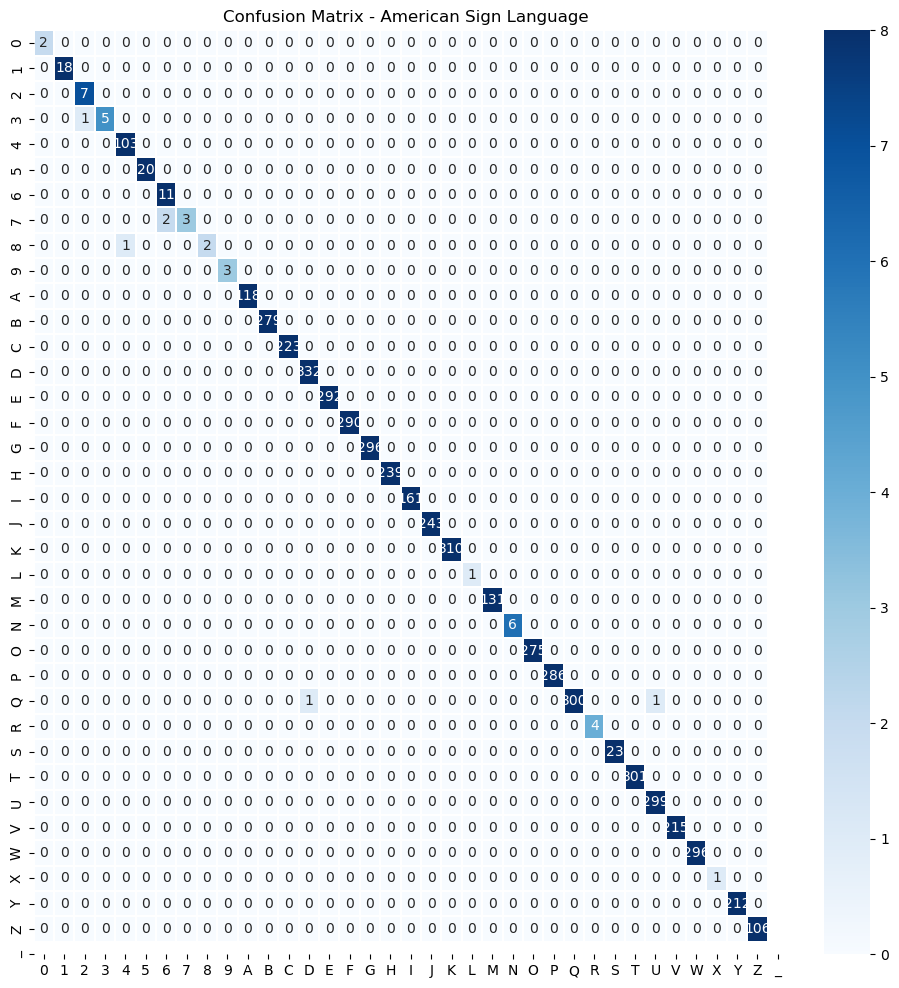

In [102]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [103]:
maping.figure.savefig("output.png")